/tmp/ipykernel_51233/2251918608.py:19: RuntimeWarning: invalid value encountered in divide
  u_normalized = u / norm
/tmp/ipykernel_51233/2251918608.py:20: RuntimeWarning: invalid value encountered in divide
  v_normalized = v / norm


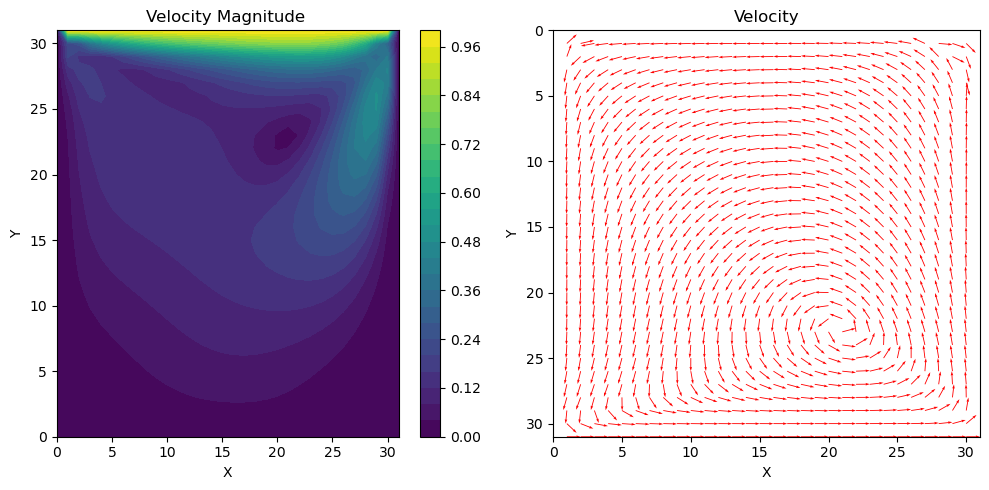

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读取速度分量数据
u = np.loadtxt('u.dat')
v = np.loadtxt('v.dat')

# 计算速度大小
magnitude = np.sqrt(u**2 + v**2)

# 创建网格
n = u.shape[0]
x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x, n - 1 - y)

# 归一化速度矢量
norm = np.sqrt(u**2 + v**2)
u_normalized = u / norm
v_normalized = v / norm

# 设定箭头长度
arrow_length = 0.1  # 可调整的箭头长度

# 绘制速度大小的等高线图
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
contour = plt.contourf(X, Y, magnitude, levels=25, cmap='viridis')
plt.colorbar(contour)
plt.title('Velocity Magnitude ')
plt.xlabel('X')
plt.ylabel('Y')

# 绘制归一化的速度矢量图
plt.subplot(1, 2, 2)
plt.quiver(X, Y, u_normalized, v_normalized, angles='xy', scale_units='xy', scale=1, color='r', width=0.002)
plt.xlim(0, n - 1)
plt.ylim(n - 1, 0)
plt.title('Velocity')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()




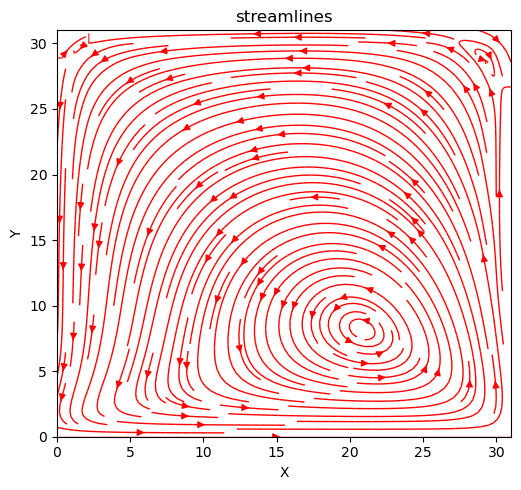

In [2]:

# 创建网格
n = u.shape[0]
x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x, y)  # Y保持递增

# 计算速度大小
magnitude = np.sqrt(u**2 + v**2)

# 绘制速度大小的等高线图
plt.figure(figsize=(10, 5))


# 绘制流线图
plt.subplot(1, 2, 2)
strm = plt.streamplot(X, Y, u, -v, color='r', linewidth=1, density=1.8)  # 翻转v
plt.xlim(0, n - 1)
plt.ylim(0, n - 1)  # 确保Y轴正确显示
plt.title('streamlines')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()